In [2]:
# Libraries for preprocessing
import nltk
import re

# Scientific libraries 
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn import preprocessing

# Data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

## Phase 0: EDA and visualization

In [3]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,NaN,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,NaN,137.0,40.0,35.0,168.0,NaN,NaN,33.0,1


Q1.

In [4]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,635.000000,654.000000,680.000000,624.000000,680.000000,684.000000,590.000000,655.000000,768.000000
mean,3.700787,113.422018,68.786765,20.386218,80.123529,32.083626,0.466676,33.157252,0.348958
std,3.518126,202.816831,19.724841,15.987049,115.681140,7.800741,0.322408,13.829831,0.476951
min,-22.000000,-5000.000000,-2.000000,0.000000,0.000000,0.000000,0.078000,-150.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.375000,0.243250,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,34.000000,32.300000,0.368000,29.000000,0.000000
75%,6.000000,140.750000,80.000000,32.000000,129.250000,36.600000,0.611500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.329000,81.000000,1.000000


In [5]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               635 non-null    float64
 1   Glucose                   654 non-null    float64
 2   BloodPressure             680 non-null    float64
 3   SkinThickness             624 non-null    float64
 4   Insulin                   680 non-null    float64
 5   BMI                       684 non-null    float64
 6   DiabetesPedigreeFunction  590 non-null    float64
 7   Age                       655 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


Q2.

In [6]:
for feature in diabetes:
    print("Number of NaN", feature, ":", diabetes[feature].isnull().sum())
    print("Percentage of NaN", feature, ":", diabetes[feature].isnull().sum() * 100/len(diabetes), "%")
    print("---------------------------------")

Number of NaN Pregnancies : 133
Percentage of NaN Pregnancies : 17.317708333333332 %
---------------------------------
Number of NaN Glucose : 114
Percentage of NaN Glucose : 14.84375 %
---------------------------------
Number of NaN BloodPressure : 88
Percentage of NaN BloodPressure : 11.458333333333334 %
---------------------------------
Number of NaN SkinThickness : 144
Percentage of NaN SkinThickness : 18.75 %
---------------------------------
Number of NaN Insulin : 88
Percentage of NaN Insulin : 11.458333333333334 %
---------------------------------
Number of NaN BMI : 84
Percentage of NaN BMI : 10.9375 %
---------------------------------
Number of NaN DiabetesPedigreeFunction : 178
Percentage of NaN DiabetesPedigreeFunction : 23.177083333333332 %
---------------------------------
Number of NaN Age : 113
Percentage of NaN Age : 14.713541666666666 %
---------------------------------
Number of NaN Outcome : 0
Percentage of NaN Outcome : 0.0 %
---------------------------------


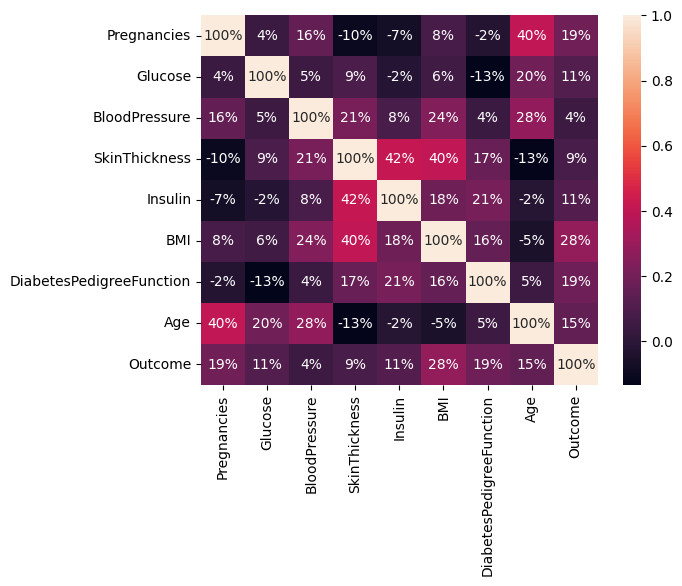

In [7]:
# plt.figure(figsize=(5, 5))
sns.heatmap(diabetes.corr(), annot=True, fmt=".0%")
plt.show()

As we see in the plot BMI has the most dependency to outcome.

In [8]:
diabetes.drop(columns=['BloodPressure'], inplace=True)

In [9]:
diabetes.hist(figsize=(12, 8))

In [10]:
for feature in diabetes:
    if feature != 'Outcome':
        plt.figure(figsize=(5, 3))
        plt.scatter(diabetes[feature], diabetes['Outcome'])
        plt.xlabel(feature)
        plt.ylabel('Outcome')
        plt.show()

In [11]:
for feature in diabetes:
    if feature != 'Outcome':
        plt.figure(figsize=(5, 3))
        plt.hexbin(diabetes[feature], diabetes['Outcome'], gridsize=40, cmap='Blues') 
        plt.xlabel(feature)
        plt.ylabel('Outcome')
plt.show()

Before doing anything new, let's seperate X and y dataframes from the dataset:

In [12]:
# X, y = diabetes.drop(['Outcome'], axis=1, inplace=False) , diabetes['Outcome']

## Phase 1: Preprocessing

Q1:

Replace all missing values with the same value

Replace missing values with different values for each column

>These methods are used for categorical features, but it doesn’t factor the correlations between features and it can introduce bias in the data.

Replace missing values with mean, median, mode, etc. for each column

>This method is used for numerical values.

Replace missing values with previous/next valid values

>If method is set to 'ffill' or 'pad', missing values are replaced with previous valid values (= forward fill), and if 'bfill' or 'backfill', replaced with the next valid values (= backward fill).

Replace missing values with linear or spine interpolation by using interpolate()

>It accepts a wide variety of arguments, including, nearest, zero, slinear, quadratic, cubic, spline, barycentric, polynomial, krogh, piecewise_polynomial, spline, pchip, akima, cubicspline, etc.

Q2.

As we see the percentage of missing values in last part, DiabetesPedigreeFunction has the most NaN values with 23.17%. also SkinThickness and Pregnancies are in second and third place with 18.75% and 17.31%.

In [15]:
for feature in diabetes.columns:
    if feature != 'Outcome' and feature != 'Pregnancies':
        diabetes[feature][diabetes[feature] <= 0] = np.nan
    elif feature == 'Pregnancies':
        diabetes[feature][diabetes[feature] < 0] = np.nan

diabetes.describe()

C:\Users\MY-IDEA\AppData\Local\Temp\ipykernel_22704\3223396369.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes[feature][diabetes[feature] < 0] = np.nan
C:\Users\MY-IDEA\AppData\Local\Temp\ipykernel_22704\3223396369.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes[feature][diabetes[feature] <= 0] = np.nan


,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,633.000000,649.000000,438.000000,351.000000,675.000000,590.000000,654.000000,768.000000
mean,3.753555,122.000000,29.043379,155.225071,32.511407,0.466676,33.437309,0.348958
std,3.357769,30.798028,10.600092,119.458674,6.909103,0.322408,11.836619,0.476951
min,0.000000,44.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,21.250000,76.000000,27.500000,0.243250,24.000000,0.000000
50%,3.000000,117.000000,29.000000,126.000000,32.400000,0.368000,29.000000,0.000000
75%,6.000000,141.000000,36.000000,190.000000,36.650000,0.611500,41.000000,1.000000
max,17.000000,199.000000,99.000000,846.000000,67.100000,2.329000,81.000000,1.000000


In [16]:
diabetes.isnull().sum() * 100/len(diabetes)

Pregnancies                 17.578125
Glucose                     15.494792
SkinThickness               42.968750
Insulin                     54.296875
BMI                         12.109375
DiabetesPedigreeFunction    23.177083
Age                         14.843750
Outcome                      0.000000
dtype: float64

In [17]:
diabetes.drop(columns=['Insulin', 'SkinThickness'], inplace=True)
diabetes

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,33.6,0.627,50.0,1
1,1.0,85.0,26.6,0.351,31.0,0
2,NaN,183.0,23.3,0.672,32.0,1
3,1.0,89.0,28.1,0.167,21.0,0
4,NaN,137.0,NaN,NaN,33.0,1
...,...,...,...,...,...,...
763,10.0,101.0,32.9,NaN,63.0,0
764,2.0,122.0,36.8,0.340,NaN,0
765,5.0,NaN,26.2,0.245,30.0,0
766,1.0,126.0,30.1,0.349,NaN,1


In [18]:
X, y = diabetes.drop(['Outcome'], axis=1, inplace=False) , diabetes['Outcome']

In [19]:
for col in X.columns:
    X.fillna(X[col].median(), inplace=True)
X

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,33.6,0.627,50.0
1,1.0,85.0,26.6,0.351,31.0
2,3.0,183.0,23.3,0.672,32.0
3,1.0,89.0,28.1,0.167,21.0
4,3.0,137.0,3.0,3.000,33.0
...,...,...,...,...,...
763,10.0,101.0,32.9,3.000,63.0
764,2.0,122.0,36.8,0.340,3.0
765,5.0,3.0,26.2,0.245,30.0
766,1.0,126.0,30.1,0.349,3.0


In [20]:
# X.drop(X[(X['Pregnancies'] < 0)].index, inplace=True)
# X.drop(X[(X['Glucose'] < 0)].index, inplace=True)
X.describe()

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.621094,103.561198,28.937760,1.053827,28.919271
std,3.061460,51.555809,11.608657,1.106350,15.379807
min,0.000000,3.000000,3.000000,0.078000,3.000000
25%,1.000000,88.000000,25.100000,0.263000,22.000000
50%,3.000000,110.000000,30.900000,0.512000,27.000000
75%,5.000000,136.000000,35.825000,1.326750,39.000000
max,17.000000,199.000000,67.100000,3.000000,81.000000


In [21]:
X.isna().sum()

Pregnancies                 0
Glucose                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

Q3.

<font size = 4> **Numerical Encoding** <font>

**Standardization**

Standardization (or Z-score normalization) is the process of rescaling the features so that they’ll have the properties of a Gaussian distribution with μ=0 and σ=1 where μ is the mean and σ is the standard deviation from the mean. Standard scores of the samples are calculated as follows:

$$ z = \frac{x - μ}{σ} $$

Standardization can be helpful in cases where the data follows a Gaussian distribution. However, this does not have to be necessarily true. Standardization does not have a bounding range. So, even if you have outliers in your data, they will not be affected by standardization.

**Normalization**

Normalization often also simply called Min-Max scaling basically shrinks the range of the data such that the range is fixed between 0 and 1 (or -1 to 1 if there are negative values). It works better for cases in which the standardization might not work so well. If the distribution is not Gaussian or the standard deviation is very small, the min-max scaler works better. Normalization is typically done via the following equation:

$$ X_{new} = \frac{X - X_{min}}{X_{max} - X_{min}} $$

Normalization is useful when there are no outliers as it cannot cope up with them like K-Nearest Neighbors and Neural Networks.

Normalizing the data is sensitive to outliers, so if there are outliers in the data set it is a bad practice. Standardization creates a new data not bounded. Since our values follow a guassian distribution, we use standardization method.

In [23]:
for feature in X:
    scaled = preprocessing.StandardScaler().fit(X[[feature]])
    X[feature] = scaled.transform(X[[feature]])
X

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age
0,0.777556,0.862517,0.401879,-0.386049,1.371569
1,-0.856716,-0.360256,-0.201512,-0.635680,0.135378
2,-0.203007,1.541835,-0.485968,-0.345348,0.200441
3,-0.856716,-0.282620,-0.072214,-0.802101,-0.515249
4,-0.203007,0.649017,-2.235802,1.760240,0.265503
...,...,...,...,...,...
763,2.084973,-0.049711,0.341540,1.760240,2.217384
764,-0.529862,0.357880,0.677715,-0.645629,-1.686378
765,0.450702,-1.951802,-0.235992,-0.731553,0.070315
766,-0.856716,0.435517,0.100184,-0.637489,-1.686378


Q4.

<font size = 4> **Categotical Encoding** <font>
<font size = 3>
- Label Encoding
- One-Hot Encoding
<font>

**Label Encoding** assigning each label to a unique integer based on alphabetical ordering.

> When categorical feature is ordinal or the number of categories is quite large so one-hot encoding can lead to high memory consumption

**One-Hot Encoding**  adding new columns for each categorical value and assigining a binary vector to each row.

> When categorical feature is not ordinal or the number of categorical features is less so one-hot encoding can be effectively applied

Since our datas are numerical and we do not have any categorical data, so we don't need to use these two.

Q5.

Since we don't have any unique columns or columns with a lot of NaN values, we don't need to delete any columns.

Q6.

In the context of Machine Learning, we split our modelling dataset into training and testing samples. The creation of different samples for training and testing helps us evaluate model performance and void overfitting.
ome common inferences that can be derived on dataset split include:

If there are multiple meta-parameters to tune, the machine learning model will need a larger validation set to optimize the model's performance. Similarly, if the model has fewer or no hyperparameters, it will be easy to validate the model using a small set of data.

The truth is There is no optimal split percentage.

One has to come to a split percentage that suits the requirements and meets the model’s needs. 

However, there are two things to keep in mind when splitting the data:

1. If there is less training data, the machine learning model will show high variance in training.
2. With less testing data/validation data, your model evaluation/model performance statistic will have greater variance.

Random sampling is the oldest and most popular method for dividing a dataset. As the name suggests, the dataset is shuffled, and samples are picked randomly and put in the train, validation, or the test set based on what percentage ratio is given by the user.

Stratified sampling preserve the distribution of classes in each of the train, validation, and test sets.

Stratified sampling is, thus, a more fair way of data splitting, such that the machine learning model will be trained and validated on the same data distribution.


Q7.

The original data in a machine learning model is typically taken and split into three or four sets. The three sets commonly used are the training set, the dev set and the testing set:

The **training set** is the portion of data used to train the model. The model should observe and learn from the training set, optimizing any of its parameters.

The **validation set** is a set of data, separate from the training set, that is used to validate our model performance during training. 
This validation process gives information that helps us tune the model’s hyperparameters and configurations accordingly. It is like a critic telling us whether the training is moving in the right direction or not.
The model is trained on the training set, and, simultaneously, the model evaluation is performed on the validation set after every epoch.
The main idea of splitting the dataset into a validation set is to prevent our model from overfitting i.e., the model becomes really good at classifying the samples in the training set but cannot generalize and make accurate classifications on the data it has not seen before. 

The **testing set** is the portion of data that is tested in the final model and is compared against the previous sets of data. The testing set acts as an evaluation of the final mode and algorithm.

## Phase 2: Model Training, Evaluation and Hyper Parameter Tuning

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6, test_size=0.2)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (614, 5) (614,)
Test set: (154, 5) (154,)


- ### K Nearest Neighbors

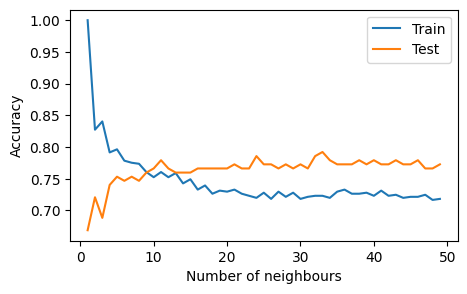

In [25]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
neighbours = range(1, 50)

test = []
train = []

for i in neighbours:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)

    train_pred= knn.predict(X_train)
    train.append(accuracy_score(y_train, train_pred))

    test_pred = knn.predict(X_test)
    test.append(accuracy_score(y_test, test_pred))

plt.figure(figsize=(5, 3))
plt.plot(neighbours, train, label='Train')
plt.plot(neighbours, test, label='Test')
plt.xlabel('Number of neighbours')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [61]:
knn = KNeighborsClassifier(n_neighbors=33)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=33)

In [62]:
predKnn = knn.predict(X_test)
print(predKnn[0:5])
print(y[:5].values)

[0 0 0 0 0]
[1 0 1 0 1]


In [63]:
from sklearn import metrics
print("K-Nearest-Neighbor's Train Accuracy: ", metrics.accuracy_score(y_train, knn.predict(X_train)))
print("K-Nearest-Neighbor's Test Accuracy: ", metrics.accuracy_score(y_test, predKnn))

K-Nearest-Neighbor's Train Accuracy:  0.7231270358306189
K-Nearest-Neighbor's Test Accuracy:  0.7922077922077922


- ### Desicion Tree

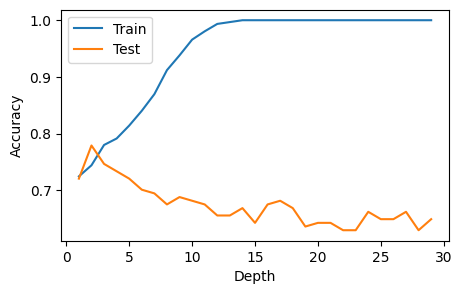

In [29]:
from sklearn.tree import DecisionTreeClassifier

depths = range(1, 30)

test = []
train = []

for i in depths:
    tree = DecisionTreeClassifier(max_depth=i)
    tree.fit(X_train,y_train)

    train_pred= tree.predict(X_train)
    train.append(accuracy_score(y_train, train_pred))

    test_pred = tree.predict(X_test)
    test.append(accuracy_score(y_test, test_pred))

plt.figure(figsize=(5, 3))
plt.plot(depths, train, label='Train')
plt.plot(depths, test, label='Test')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

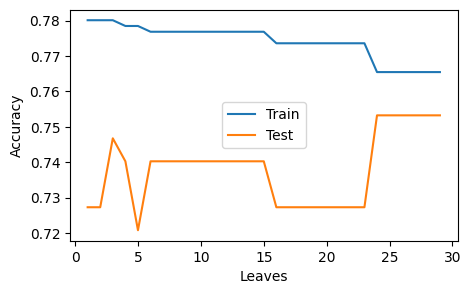

In [30]:
leaves = range(1, 30)

test = []
train = []

for i in leaves:
    tree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=i)
    tree.fit(X_train,y_train)

    train_pred= tree.predict(X_train)
    train.append(accuracy_score(y_train, train_pred))

    test_pred = tree.predict(X_test)
    test.append(accuracy_score(y_test, test_pred))

plt.figure(figsize=(5, 3))
plt.plot(leaves, train, label='Train')
plt.plot(leaves, test, label='Test')
plt.xlabel('Leaves')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [31]:
tree = DecisionTreeClassifier(max_depth=2, min_samples_leaf=24)
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=24)

In [32]:
predTree = tree.predict(X_test)
print (predTree [0:5])
print (y_test [0:5].values)

[0 0 0 0 0]
[0 1 0 0 0]


C:\Users\MY-IDEA\AppData\Local\Temp\ipykernel_22704\3486211186.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print (y_test [0:5].values)


In [33]:
print("DecisionTrees's Train Accuracy: ", metrics.accuracy_score(y_train, tree.predict(X_train)))
print("DecisionTrees's Test Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Train Accuracy:  0.7328990228013029
DecisionTrees's Test Accuracy:  0.7922077922077922


- ### Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(X_train,y_train)



LogisticRegression()

In [35]:
predLR = LR.predict(X_test)
print(predLR[:5])
print(y_test[:5].values)

[0 0 0 0 0]
[0 1 0 0 0]


C:\Users\MY-IDEA\AppData\Local\Temp\ipykernel_22704\1527066296.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print(y_test[:5].values)


In [36]:
print("Logistic Regression's Train Accuracy: ", metrics.accuracy_score(y_train, LR.predict(X_train)))
print("Logistic Regression's Test Accuracy: ", metrics.accuracy_score(y_test, predLR))

Logistic Regression's Train Accuracy:  0.7198697068403909
Logistic Regression's Test Accuracy:  0.7792207792207793


Q1.

$True Positive:$

Interpretation: You predicted positive and it’s true.

You predicted that a woman is pregnant and she actually is.

$True Negative:$

Interpretation: You predicted negative and it’s true.

You predicted that a man is not pregnant and he actually is not.

$False Positive: (Type 1 Error)$

Interpretation: You predicted positive and it’s false.

You predicted that a man is pregnant but he actually is not.

$False Negative: (Type 2 Error)$

Interpretation: You predicted negative and it’s false.

You predicted that a woman is not pregnant but she actually is.

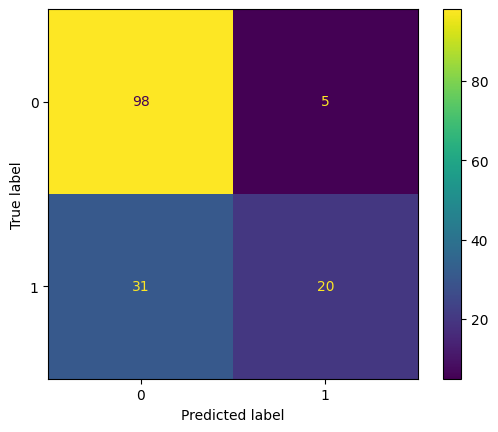

In [37]:
ConfusionMatrixDisplay.from_predictions(y_test, predKnn)

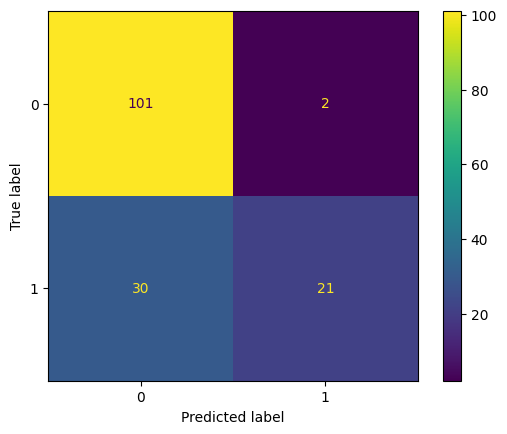

In [38]:
ConfusionMatrixDisplay.from_predictions(y_test, predTree)

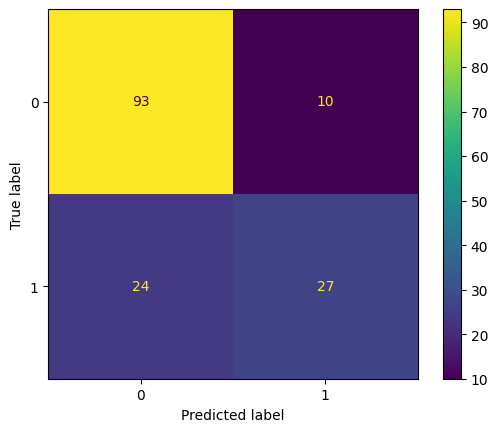

In [39]:
ConfusionMatrixDisplay.from_predictions(y_test, predLR)

Q2.

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
param_dict = {
    'n_neighbors': range(1, 50),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': range(1, 5),
    'p': [1, 2]
}
grid_knn = GridSearchCV(knn, param_dict, cv=10, scoring='accuracy', verbose = 1, n_jobs=-1)
grid_knn.fit(X_train, y_train)

Fitting 10 folds for each of 3136 candidates, totalling 31360 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=47), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': range(1, 5), 'n_neighbors': range(1, 50),
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [42]:
print(grid_knn.best_params_)
print(grid_knn.score(X_train, y_train))
print(grid_knn.score(X_test, y_test))

{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 4, 'p': 1, 'weights': 'uniform'}
0.8029315960912052
0.7402597402597403


In [43]:
param_dict = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 10),
    'min_samples_split': range(2, 10),
    'min_samples_leaf': range(1, 5)
}
grid_tree = GridSearchCV(tree, param_dict, cv=10, scoring='accuracy', verbose=1, n_jobs=-1)
grid_tree.fit(X_train, y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(max_depth=2, min_samples_leaf=24),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(2, 10)},
             scoring='accuracy', verbose=1)

In [44]:
print(grid_tree.best_params_)
print(grid_tree.score(X_train, y_train))
print(grid_tree.score(X_test, y_test))

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2}
0.7801302931596091
0.7467532467532467


In [45]:
grid_logistic={
    'C' : np.logspace(-3,3,7),
    'penalty' : ["l1","l2"]
}
grid_logistic = GridSearchCV(LR, grid_logistic, cv=10, scoring='accuracy', verbose=1, n_jobs=-1)
grid_logistic.fit(X_train, y_train)

Fitting 10 folds for each of 14 candidates, totalling 140 fits


c:\Users\MY-IDEA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\MY-IDEA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\MY-IDEA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\MY-IDEA\AppData\Local\Program

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=1)

In [46]:
print(grid_logistic.best_params_)
print(grid_logistic.score(X_test, y_test))

{'C': 10.0, 'penalty': 'l2'}
0.7792207792207793


Q3.

**Overfitting** happens when a model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data. This means that the noise or random fluctuations in the training data is picked up and learned as concepts by the model. The problem is that these concepts do not apply to new data and negatively impact the models ability to generalize.

**Underfitting** refers to a model that can neither model the training data nor generalize to new data. An underfit machine learning model is not a suitable model and will be obvious as it will have poor performance on the training data.

## Phase 3: Ensemble Methods

Q1.

**max_depth:** The max_depth of a tree in Random Forest is defined as the longest path between the root node and the leaf node.

**min_sample_split:** A parameter that tells the decision tree in a random forest the minimum required number of observations in any given node in order to split it.

**max_leaf_nodes:** This hyperparameter sets a condition on the splitting of the nodes in the tree and hence restricts the growth of the tree.

**min_samples_leaf:** This hyperparameter specifies the minimum number of samples that should be present in the leaf node after splitting a node.

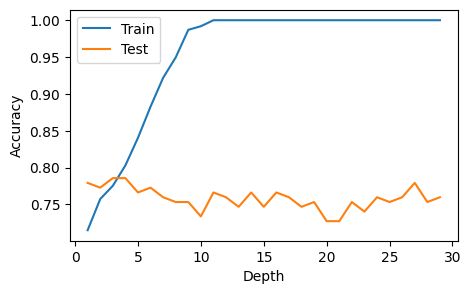

In [47]:
from sklearn.ensemble import RandomForestClassifier

depths = range(1, 30)

test = []
train = []

for i in depths:
    forest = RandomForestClassifier(max_depth=i)
    forest.fit(X_train,y_train)

    train_pred= forest.predict(X_train)
    train.append(accuracy_score(y_train, train_pred))

    test_pred = forest.predict(X_test)
    test.append(accuracy_score(y_test, test_pred))

plt.figure(figsize=(5, 3))
plt.plot(depths, train, label='Train')
plt.plot(depths, test, label='Test')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

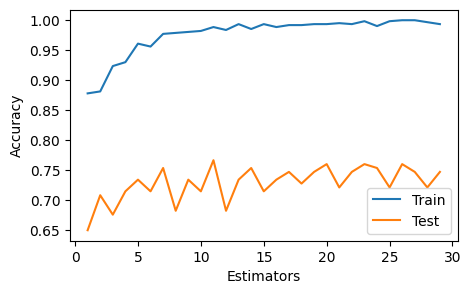

In [48]:
estimators = range(1, 30)

test = []
train = []

for i in estimators:
    forest = RandomForestClassifier(max_depth=13, n_estimators=i)
    forest.fit(X_train,y_train)

    train_pred= forest.predict(X_train)
    train.append(accuracy_score(y_train, train_pred))

    test_pred = forest.predict(X_test)
    test.append(accuracy_score(y_test, test_pred))

plt.figure(figsize=(5, 3))
plt.plot(estimators, train, label='Train')
plt.plot(estimators, test, label='Test')
plt.xlabel('Estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

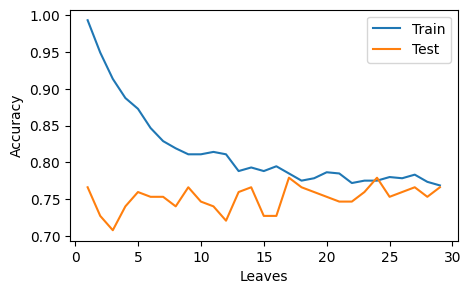

In [49]:
leaves = range(1, 30)

test = []
train = []

for i in leaves:
    forest = RandomForestClassifier(max_depth=13, n_estimators=17, min_samples_leaf=i)
    forest.fit(X_train,y_train)

    train_pred= forest.predict(X_train)
    train.append(accuracy_score(y_train, train_pred))

    test_pred = forest.predict(X_test)
    test.append(accuracy_score(y_test, test_pred))

plt.figure(figsize=(5, 3))
plt.plot(leaves, train, label='Train')
plt.plot(leaves, test, label='Test')
plt.xlabel('Leaves')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [50]:
random_forest = RandomForestClassifier(max_depth=12, n_estimators=17, min_samples_leaf=27)
random_forest.fit(X_train,y_train)

RandomForestClassifier(max_depth=12, min_samples_leaf=27, n_estimators=17)

In [51]:
predForest = random_forest.predict(X_test)
print(predForest[:5])
print(y_test[:5].values)

[0 0 0 0 0]
[0 1 0 0 0]


C:\Users\MY-IDEA\AppData\Local\Temp\ipykernel_22704\2820994462.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print(y_test[:5].values)


In [52]:
print("Forest's Accuracy: ", metrics.accuracy_score(y_test, predForest))

Forest's Accuracy:  0.7727272727272727


In [53]:
from mlxtend.evaluate import bias_variance_decomp

In [54]:
param_dict = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 1, 10, 20],
    'min_samples_split': [1, 2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10],
}
grid_forest = GridSearchCV(random_forest, param_dict, cv=10, scoring='accuracy', verbose=1, n_jobs=-1)
grid_forest.fit(X_train, y_train)

Fitting 10 folds for each of 128 candidates, totalling 1280 fits


c:\Users\MY-IDEA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
320 fits failed out of a total of 1280.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
320 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\MY-IDEA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\MY-IDEA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
  File "c:\Users\MY-IDEA\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\para

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_depth=12, min_samples_leaf=27,
                                              n_estimators=17),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 10, 20],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [1, 2, 5, 10]},
             scoring='accuracy', verbose=1)

In [55]:
print(grid_forest.best_params_)
print(grid_forest.score(X_test, y_test))

{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 5}
0.7402597402597403


In [56]:
random_forest = RandomForestClassifier(max_depth=10, n_estimators=23, min_samples_leaf=2)
random_forest.fit(X_train,y_train)
predForest = random_forest.predict(X_test)

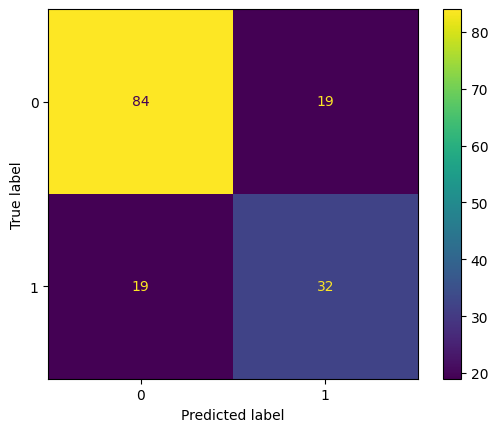

In [57]:
ConfusionMatrixDisplay.from_predictions(y_test, predForest)

Q2.

In [58]:
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        random_forest, X_train.values, y_train.values, X_test.values, y_test.values,
        random_seed=1)

print('Random_forest bias: %.3f' % avg_bias)
print('Random_forest variance: %.3f' % avg_var)


Random_forest bias: 0.260
Random_forest variance: 0.101


In [59]:
tree = DecisionTreeClassifier(max_depth=2, min_samples_leaf=1, min_samples_split=2, criterion='entropy')
tree.fit(X_train,y_train)
predTree = tree.predict(X_test)

In [60]:
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
       tree, X_train.values, y_train.values, X_test.values, y_test.values,
        random_seed=1)

print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

Average bias: 0.227
Average variance: 0.107
